# **Diabetes Prediction**

*Predict whether a person has diabetes or not.*

*Dataset Link: https://www.kaggle.com/johndasilva/diabetes*

In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


A brief explanation of data set and  how each feature might help in predicting diabetes:

- **Pregnancies**: The number of times a woman has been pregnant can affect her risk of diabetes. Frequent pregnancies may be associated with a higher risk of developing gestational diabetes, which increases the risk of developing type 2 diabetes later.

- **Glucose**: Blood glucose levels are a primary indicator of diabetes. Higher blood glucose levels are directly related to diabetes, as the disease impairs the body’s ability to regulate blood sugar.

- **BloodPressure**: High blood pressure (hypertension) is commonly associated with diabetes. Managing blood pressure is important for people with diabetes because it reduces the risk of cardiovascular complications.

- **SkinThickness**: Skinfold thickness measurements can indicate body fat distribution. Abnormal fat distribution is often associated with insulin resistance, a key feature of type 2 diabetes.

- **Insulin**: Insulin levels in the blood can indicate how well the body is managing blood sugar. Abnormal insulin levels can be a sign of insulin resistance or beta-cell dysfunction, both of which are related to diabetes.

- **BMI (Body Mass Index)**: BMI is a measure of body fat based on height and weight. Higher BMI values are associated with a greater risk of diabetes, particularly type 2 diabetes.

- **DiabetesPedigreeFunction**: This is a measure of the genetic influence on diabetes. A higher value indicates a stronger genetic predisposition to diabetes.

- **Age**: The risk of developing diabetes increases with age. Older individuals are at a higher risk of developing type 2 diabetes.

- **Outcome**: This is the target variable indicating whether the individual has diabetes (1) or not (0). This variable is used to train the machine learning model to understand the relationship between the features and the presence of diabetes.

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1990,3,111,90,12,78,28.4,0.495,29,0
1991,6,102,82,0,0,30.8,0.180,36,1
1992,6,134,70,23,130,35.4,0.542,29,1
1993,2,87,0,23,0,28.9,0.773,25,0
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


# Exploring the dataset

In [8]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [9]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [12]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [13]:
# Returns basic statistics on numeric columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [14]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [15]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [16]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

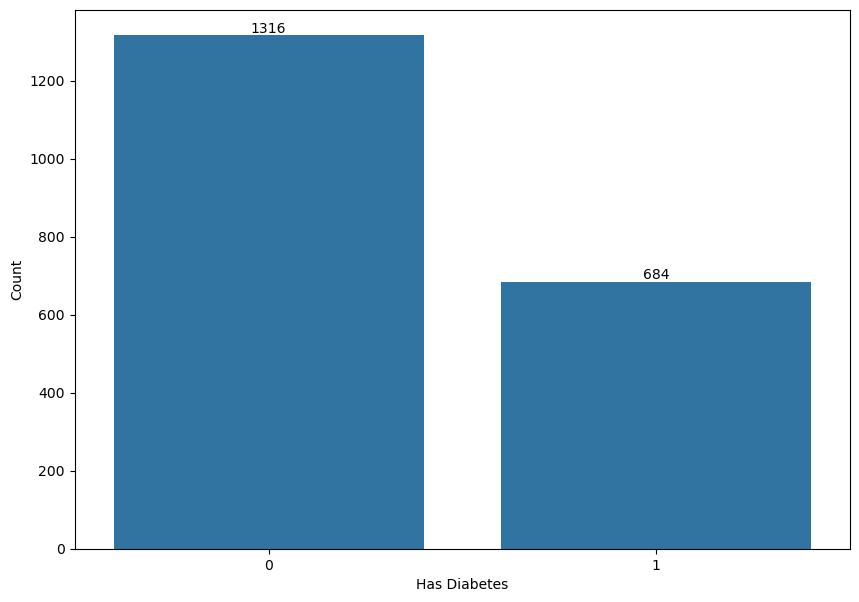

In [17]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))

ax=sns.countplot(x='Outcome', data=df)

for bars in ax.containers:
    ax.bar_label(bars)
# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

Text(0.5, 1.0, 'Insulin vs Outcome')

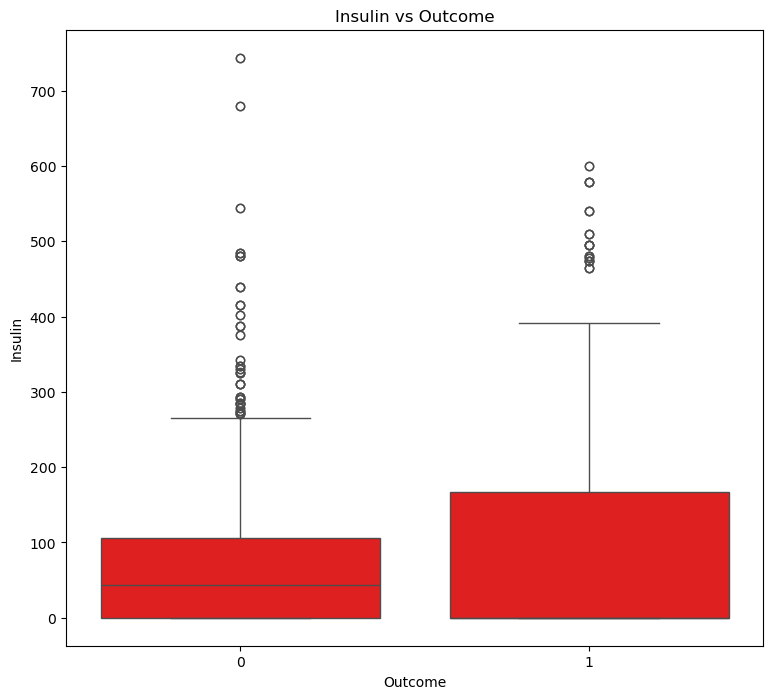

In [18]:
plt.figure(figsize=(9,8)) #size of the figure
sns.boxplot(data=df,x="Outcome", y="Insulin", color="Red") #plotting the box plot for Salary vs gender.
plt.title("Insulin vs Outcome") #plot title.

Text(0.5, 1.0, 'Age vs Outcome')

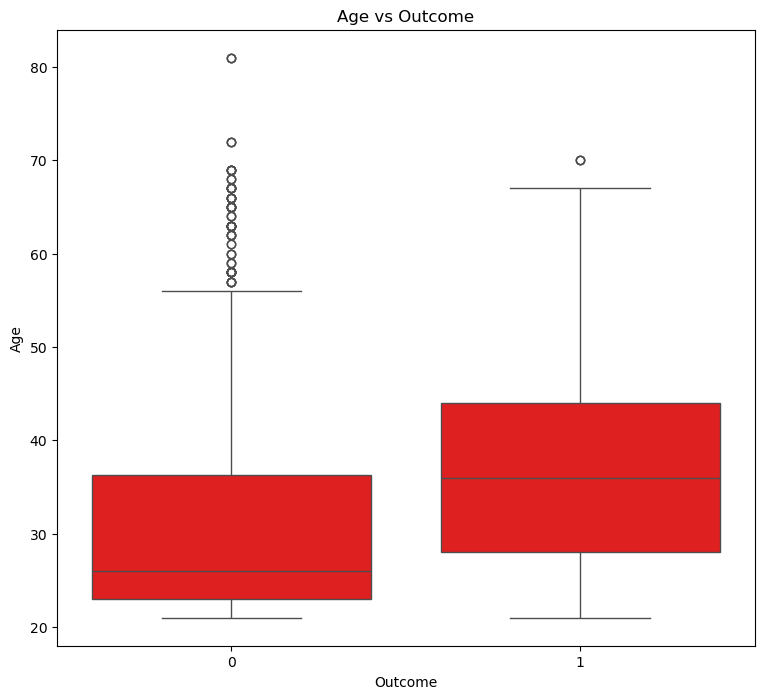

In [19]:
plt.figure(figsize=(9,8)) #size of the figure
sns.boxplot(data=df,x="Outcome", y="Age", color="Red") #plotting the box plot for Salary vs gender.
plt.title("Age vs Outcome") #plot title.

Text(0.5, 1.0, 'Age vs Outcome')

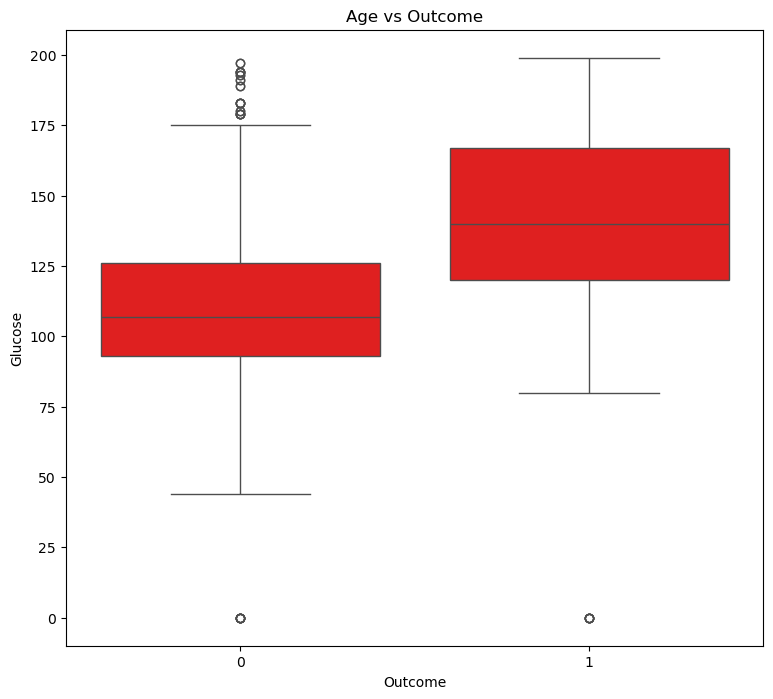

In [20]:
plt.figure(figsize=(9,8)) #size of the figure
sns.boxplot(data=df,x="Outcome", y="Glucose", color="Red") #plotting the box plot for Salary vs gender.
plt.title("Age vs Outcome") #plot title.

Text(0.5, 1.0, 'BloodPressure vs Outcome')

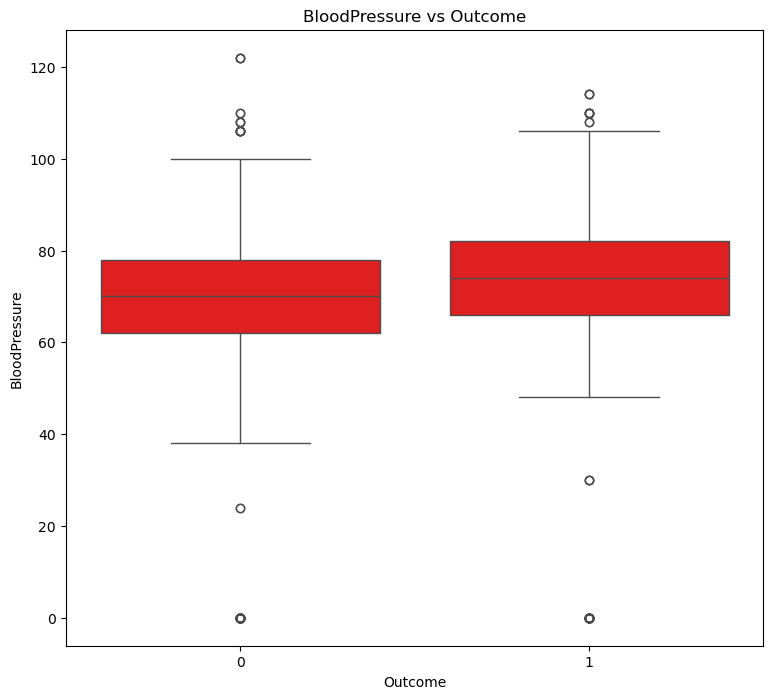

In [21]:
plt.figure(figsize=(9,8)) #size of the figure
sns.boxplot(data=df,x="Outcome", y="BloodPressure", color="Red") #plotting the box plot for Salary vs gender.
plt.title("BloodPressure vs Outcome") #plot title.

Text(0.5, 1.0, 'BMI vs Outcome')

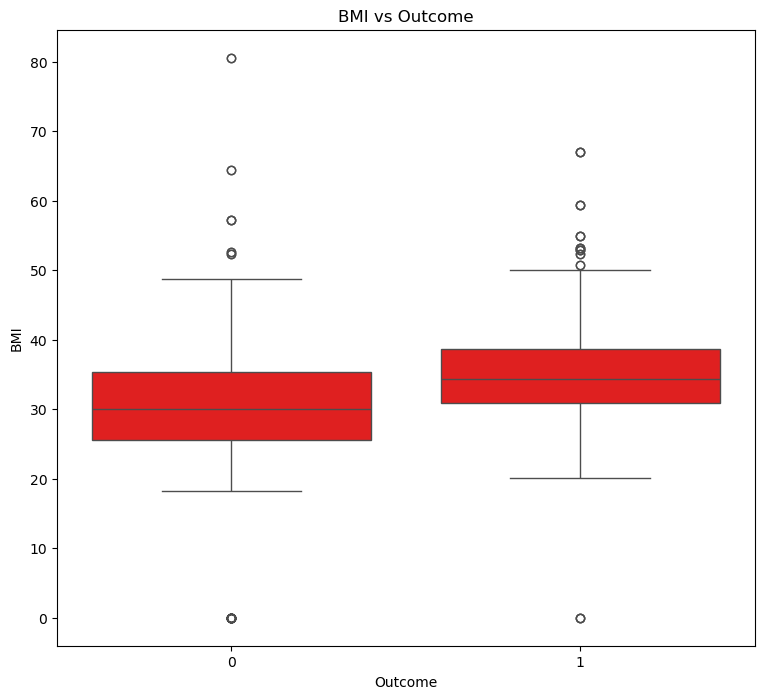

In [22]:
plt.figure(figsize=(9,8)) #size of the figure
sns.boxplot(data=df,x="Outcome", y="BMI", color="Red") #plotting the box plot for Salary vs gender.
plt.title("BMI vs Outcome") #plot title.

# Data Cleaning

In [24]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

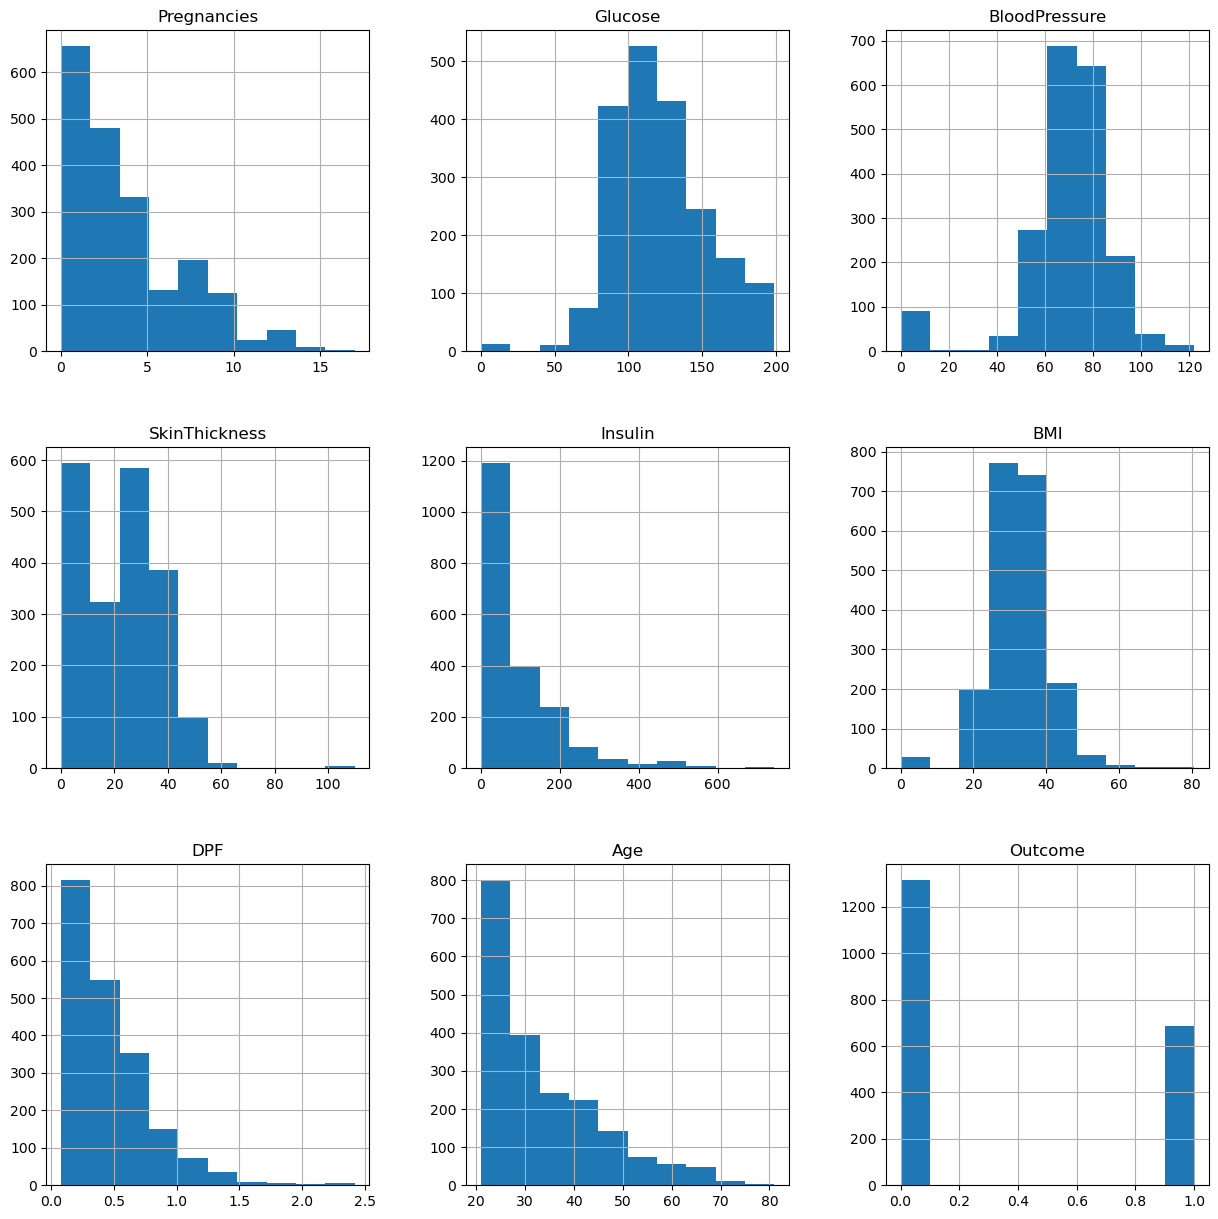

In [25]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df.hist(figsize = (15,15))

In [26]:
# Calculate mean, median, and mode for 'SkinThickness'
skinthickness_mean = df['SkinThickness'].mean()
skinthickness_median = df['SkinThickness'].median()
skinthickness_mode = df['SkinThickness'].mode()[0]
skinthickness_mean
#skinthickness_median
#skinthickness_mode

20.935

In [27]:
# Replacing NaN value by mean, median depending upon distribution
df['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6008\568066472.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_6008\568066472.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

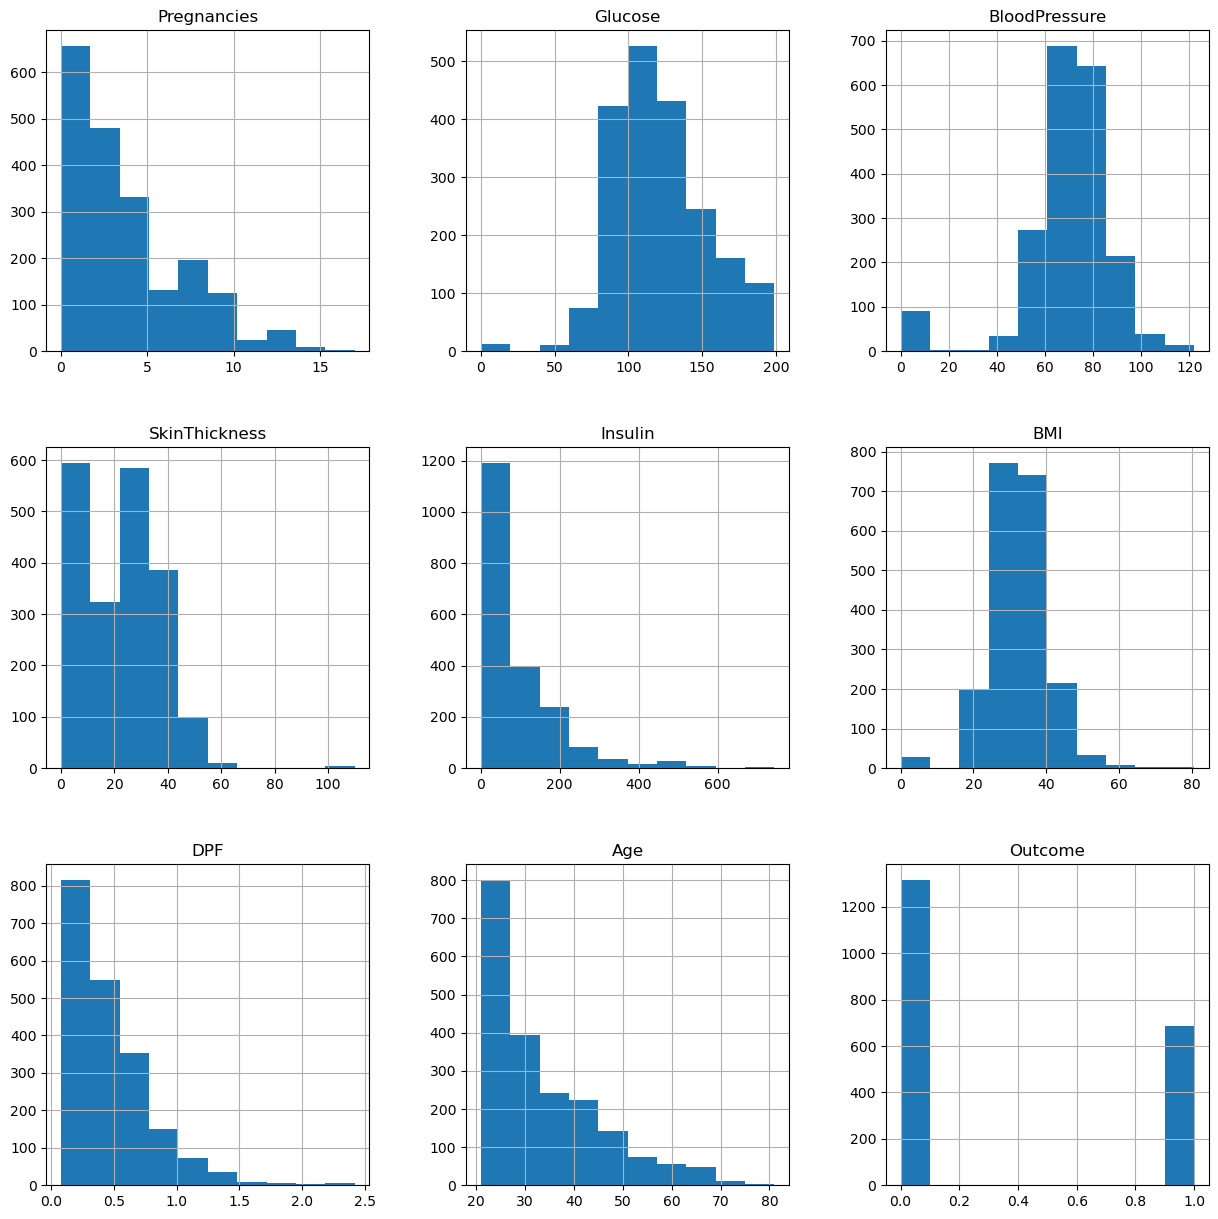

In [28]:
# Plotting histogram of dataset after replacing NaN values
p = df.hist(figsize=(15,15))

In [29]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

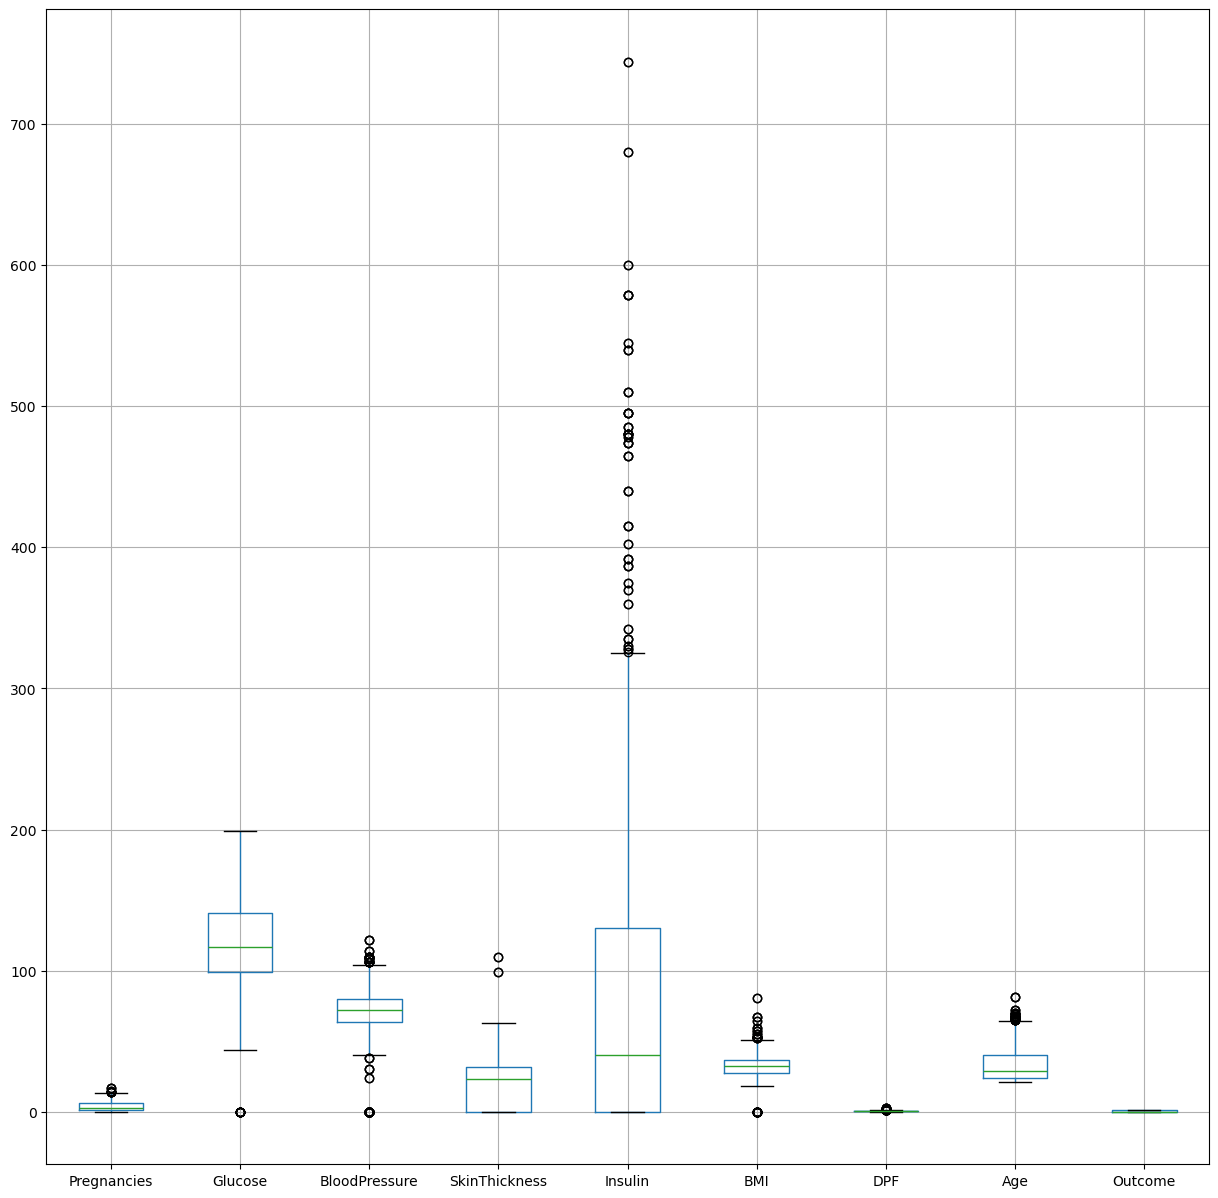

In [30]:
q = df.boxplot(figsize = (15,15))

# Model Building

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [33]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train

array([[ 2.54014777, -0.01485297,  0.466638  , ..., -0.70153446,
        -0.65077302,  2.50732972],
       [ 4.06518958,  1.29329836,  0.16097992, ...,  1.04410009,
         1.04381097,  1.21199837],
       [-0.81494422, -0.60663571,  0.26286595, ...,  0.87438562,
        -0.5475188 ,  0.78022125],
       ...,
       [ 0.10008087, -0.82466093, -0.24656419, ..., -0.03479904,
        -0.94838813, -0.16968841],
       [ 2.23513941, -1.13612553,  0.26286595, ..., -0.26512582,
        -0.52626057,  0.17573329],
       [ 0.40508923,  0.45234393,  0.67041006, ..., -3.91398693,
         0.50628164,  3.11181769]])

In [36]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [37]:
# Initialize the Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Calculate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Print the performance metrics for Decision Tree
print('Decision Tree Metrics:')
print('Accuracy:', round(accuracy_dt, 2))
print('Precision:', round(precision_dt, 2))
print('Recall:', round(recall_dt, 2))
print('F1-Score:', round(f1_dt, 2))
print('Confusion Matrix:\n', conf_matrix_dt)
print('Classification Report:\n', class_report_dt)

Decision Tree Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 0.98
F1-Score: 0.98
Confusion Matrix:
 [[268   4]
 [  2 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       272
           1       0.97      0.98      0.98       128

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.99      0.98      0.99       400



In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the performance metrics for Random Forest
print('Random Forest Metrics:')
print('Accuracy:', round(accuracy_rf, 2))
print('Precision:', round(precision_rf, 2))
print('Recall:', round(recall_rf, 2))
print('F1-Score:', round(f1_rf, 2))
print('Confusion Matrix:\n', conf_matrix_rf)
print('Classification Report:\n', class_report_rf)


Random Forest Metrics:
Accuracy: 0.99
Precision: 1.0
Recall: 0.98
F1-Score: 0.99
Confusion Matrix:
 [[272   0]
 [  2 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [39]:
from sklearn.svm import SVC

# Initialize the SVM Classifier
model_svm = SVC(random_state=42)

# Train the model
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the performance metrics for SVM
print('SVM Metrics:')
print('Accuracy:', round(accuracy_svm, 2))
print('Precision:', round(precision_svm, 2))
print('Recall:', round(recall_svm, 2))
print('F1-Score:', round(f1_svm, 2))
print('Confusion Matrix:\n', conf_matrix_svm)
print('Classification Report:\n', class_report_svm)


SVM Metrics:
Accuracy: 0.81
Precision: 0.78
Recall: 0.59
F1-Score: 0.67
Confusion Matrix:
 [[251  21]
 [ 53  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       272
           1       0.78      0.59      0.67       128

    accuracy                           0.81       400
   macro avg       0.80      0.75      0.77       400
weighted avg       0.81      0.81      0.81       400



*Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.*

# CROSS VALIDATION

In [42]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
# Perform cross-validation
results_dt = cross_val_score(model_dt, X, y, cv=ssplit)

# Print results
print('Decision Tree Cross-validation Results:', results_dt)
print('Mean Accuracy:', np.mean(results_dt))


Decision Tree Cross-validation Results: [0.96833333 0.96       0.97166667 0.945      0.93666667 0.97333333
 0.95       0.98       0.94666667 0.95666667]
Mean Accuracy: 0.9588333333333333


In [43]:
# Initialize the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

# Perform cross-validation
results_rf = cross_val_score(model_rf, X, y, cv=ssplit)

# Print results
print('Random Forest Cross-validation Results:', results_rf)
print('Mean Accuracy:', np.mean(results_rf))


Random Forest Cross-validation Results: [0.955      0.96333333 0.96333333 0.96166667 0.965      0.97166667
 0.965      0.94833333 0.955      0.97833333]
Mean Accuracy: 0.9626666666666667


In [44]:
# Initialize the SVM model
model_svm = SVC(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

# Perform cross-validation
results_svm = cross_val_score(model_svm, X, y, cv=ssplit)

# Print results
print('SVM Cross-validation Results:', results_svm)
print('Mean Accuracy:', np.mean(results_svm))


SVM Cross-validation Results: [0.80166667 0.75166667 0.76       0.77       0.79333333 0.77833333
 0.76666667 0.78       0.74       0.78      ]
Mean Accuracy: 0.7721666666666667


# Predictions

In [47]:
import pickle
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

print("Model saved successfully.")


Model saved successfully.


In [48]:
with open('sc.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

# Deployment

In [50]:
streamlit_code = """
import streamlit as st
import pickle
import numpy as np

# Load the trained RandomForest model and scaler
with open('diabetes_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create the web app
st.title('Diabetes Prediction App')

# Input fields
Pregnancies = st.number_input('Pregnancies', min_value=0.0, max_value=20.0, value=0.0, step=1.0)
Glucose = st.number_input('Glucose', min_value=0.0, max_value=400.0, value=30.0, step=1.0)
BloodPressure = st.number_input('BloodPressure', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
SkinThickness = st.number_input('SkinThickness', min_value=0.0, max_value=200.0, value=0.0, step=1.0)
Insulin = st.number_input('Insulin', min_value=0.0, max_value=700.0, value=0.0, step=1.0)
DiabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction', min_value=0.0, max_value=2.0, value=0.0, step=0.01)
BMI = st.number_input('BMI', min_value=0.0, max_value=150.0, value=20.0, step=0.1)
Age = st.number_input('Age', min_value=15.0, max_value=100.0, value=25.0, step=1.0)

# Prepare the feature vector
features = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]], dtype=np.float64)

# Scale the features
features_scaled = scaler.transform(features)

# Predict Diabetes
predicted_Diabetes = model.predict(features_scaled)

prediction_label = "Yes" if predicted_Diabetes[0] == 1 else "No"
st.write(f'Predicted Diabetes: {prediction_label}')
"""

# Saving to file
import os

file_path = os.path.join(os.getcwd(), 'diabetesapp.py')

try:
    with open(file_path, 'w') as file:
        file.write(streamlit_code)
    print(f"File '{file_path}' has been saved.")
except Exception as e:
    print(f"Error saving file: {e}")

File 'C:\Users\hp\Downloads\diabetesapp.py' has been saved.
